In [1]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 80

In [4]:
#generar un dataset aleatorio
from sklearn.datasets import make_blobs
#semilla de aleatorios
np.random.seed(123)
#variables
variables=['X','Y','Z']
#etiquetas
etiquetas=['ID_0','ID_1','ID_2','ID_3','ID_4']
#generar muestras aleatorias continuas uniformes entre 0 y 10
X = np.random.sample([5,3])*10
#contruccion del dataset
df = pd.DataFrame(X,columns=variables,index=etiquetas)


In [5]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [7]:
####matriz de distancia

#importar libreria de distancias
from scipy.spatial.distance import pdist, squareform
#pdis -> distancias por parejas entre observaciones en espacio n-dimensional
#squareform -> convierte un vector de distancia de forma vectorial en una matriz de distancia de forma cuadratica

In [10]:
#vector de distancias euclidianos
distVect = pdist(df,metric='euclidean')

#los siguientes pasos solo sirven para entender los resultados del vector de distancias
#convertir en matriz cuadrada 
distMat = squareform(distVect)

#convertir en dataframe de Pandas la matriz de distancias
dist_renglon = pd.DataFrame(distMat,columns=etiquetas, index=etiquetas)


In [16]:
#mostrar
print(distVect,"\n")
print(distMat,"/n")
print(dist_renglon)

[4.973534   5.51665266 5.89988504 3.83539555 4.34707339 5.10431109
 6.69823298 7.24426159 8.31659367 4.382864  ] 

[[0.         4.973534   5.51665266 5.89988504 3.83539555]
 [4.973534   0.         4.34707339 5.10431109 6.69823298]
 [5.51665266 4.34707339 0.         7.24426159 8.31659367]
 [5.89988504 5.10431109 7.24426159 0.         4.382864  ]
 [3.83539555 6.69823298 8.31659367 4.382864   0.        ]] /n
          ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000


# matriz de enlaces
#se usa la matriz de distancias condesada (triangular superior), se podria usar la matriz redundante (completa), pero no se recomienda

In [19]:
#importar la libreria 
from scipy.cluster.hierarchy import linkage

In [20]:
#clustering
clusters = linkage(distVect,method='complete')
#complete -> algoritmo del punto mas lejano o algoritmo Voor Hees
#single -> algoritmo del punto mas lejano
#centroid -> algoritmo entre los centroides

In [23]:
#numero de pasos
num_pasos= clusters.shape[0]
# ver los resultados del agrupamiento en un dataframe de mpandas
pd.DataFrame(clusters,columns=['Etiqueta 1','Etiqueta 2','Similitud','No. en cluster'],
            index=['Paso %d' %(i+1) for i in range(num_pasos)])

,Etiqueta 1,Etiqueta 2,Similitud,No. en cluster
Paso 1,0.0,4.0,3.835396,2.0
Paso 2,1.0,2.0,4.347073,2.0
Paso 3,3.0,5.0,5.899885,3.0
Paso 4,6.0,7.0,8.316594,5.0


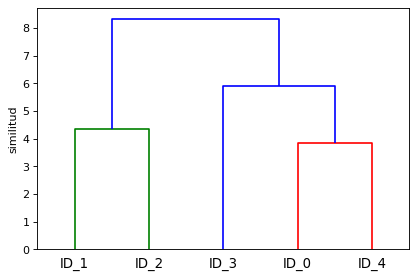

In [29]:
#visualizacion en un dendograma
#importar las librerias
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
#dendograma
dendograma = dendrogram(clusters,labels=etiquetas)
plt.ylabel('similitud')
plt.show()

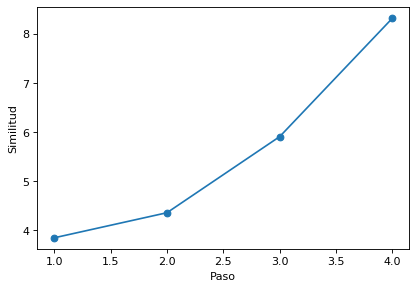

In [30]:
#seleccionar el numero de clusters
pasos=[i+1 for i in range(num_pasos)]
plt.plot(pasos, clusters[:,2], marker='o')
plt.xlabel('Paso')
plt.ylabel('Discimilitud')
plt.show()

In [35]:
#importar la libreria
from sklearn.cluster import AgglomerativeClustering

In [42]:
#instanciar el modelo
agloClus = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                  linkage='complete')
agloClus.fit(X)
#n_clusters -> numero de clusteres 
#affinity -> metrica 
#linkage -> tipo de algortimo

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [43]:
#predecir el cluster al que pertenece cada observacion
Y = agloClus.fit_predict(X)
print(Y)

[1 0 0 2 1]


# metricas clustering 

In [46]:
#importar libreria 
from sklearn.metrics import silhouette_samples, silhouette_score


In [47]:
#silueta promedio sobre todas las muestras
prom_sil = silhouette_score(X,Y)
print("silueta= ",prom_sil)

silueta=  0.18270645136135802


In [49]:
#silueta sobre cada muestra 
sil_muestras = silhouette_samples(X,Y)
for x,y in zip(etiquetas,sil_muestras):
    print(x,y)
    
#el metodo .zip empareja dos o mas listas

ID_0 0.2687650513752733
ID_1 0.1483525767471466
ID_2 0.3715035092818889
ID_3 0.0
ID_4 0.12491111940248127


In [52]:
#seleccionar el numero de clusteres 
sil=[]
for i in range(2,5):
    agc = AgglomerativeClustering(n_clusters=i,
                                 affinity='euclidean',
                                 linkage='complete')
    agc_y = agc.fit_predict(X)
    sil.append(silhouette_score(X,agc_y))


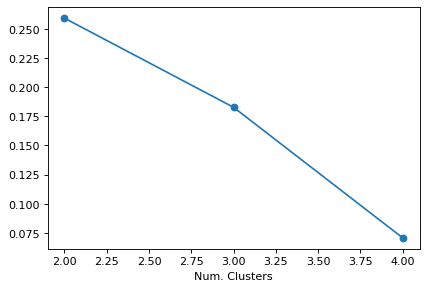

In [54]:
#graficacion
plt.plot(range(2,5),sil,marker='o')
plt.xlabel('Num. Clusters')
plt.show()

In [56]:
#asignar cluster 
agc_def = AgglomerativeClustering(n_clusters=2,
                                     affinity='euclidean',
                                     linkage='complete')
clusters_def=agc_def.fit_predict(X)
#asignar al dataframe
df['Cluster']=clusters_def

In [57]:
#mostrar resultado
df

,X,Y,Z,Cluster
ID_0,6.964692,2.861393,2.268515,0
ID_1,5.513148,7.194690,4.231065,1
ID_2,9.807642,6.848297,4.809319,1
ID_3,3.921175,3.431780,7.290497,0
ID_4,4.385722,0.596779,3.980443,0
